## Import Necessary Libraries

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

In [10]:
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)

# Reshape y to (1000, 1)
y = y.reshape(-1, 1)
print('Features:\n', X[:5])
print('\n Traget:\n', y[:5])

Features:
 [[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]
 [-0.10325476 -0.82849702  1.48986344 -1.64318881 -1.60090398]
 [-2.06340315  0.50325206 -0.64557207 -0.31735049 -1.66108342]]

 Traget:
 [[ 70.77131405]
 [-51.6042361 ]
 [-37.00044751]
 [-83.53509879]
 [-83.4003936 ]]


In [11]:
# plt.scatter(X,y)
# plt.show()

In [12]:
# Convert to tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()
# Create dataset
dataset = TensorDataset(X_tensor, y_tensor)
# Create DataLoader
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [14]:
model = nn.Linear(in_features=5, out_features=1)
criterion = nn.MSELoss()
n_epochs = 2000
lr = 0.1
errors = []
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param -= lr*param.grad
        model.zero_grad()
    if epoch % 10 == 0:
      errors.append((epoch, loss.item()))

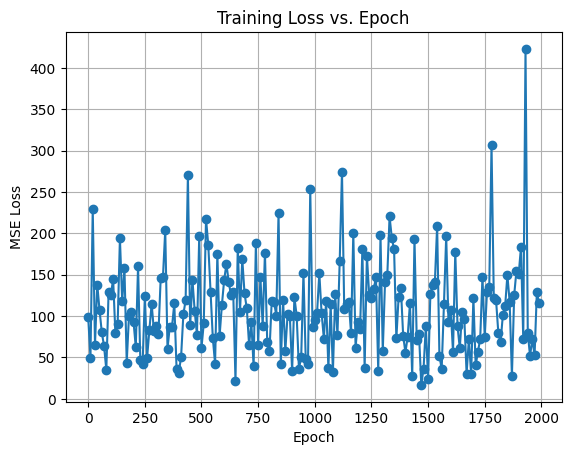

In [15]:
import matplotlib.pyplot as plt

# unpack the (epoch, loss) pairs
epochs, losses = zip(*errors)          # errors = [(epoch0, loss0), (epoch10, loss10), …]

plt.plot(epochs, losses, marker='o')
plt.title("Training Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [16]:
print(model.weight.data)
print(model.bias.data)

tensor([[29.1156, 44.9995, 17.1150, 24.5715, 18.9900]])
tensor([-1.7614])


### Using ScikitLearn Library

In [17]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X,y)
print(sk_model.coef_)
print(sk_model.intercept_)

[[28.05749028 45.94154566 16.61187941 24.53193249 19.36893323]]
[-0.6171466]


### Evaluating The Score Using $R^2$ Score

In [18]:
# PyTorch prediction
with torch.no_grad():
    y_pred_pytorch = model(X_tensor)

# sklearn prediction
y_pred_sklearn = sk_model.predict(X)

from sklearn.metrics import r2_score

score_pytorch = r2_score(y, y_pred_pytorch.numpy())
score_sklearn = r2_score(y, y_pred_sklearn)

print(f"R² Score (PyTorch):  {score_pytorch:.4f}")
print(f"R² Score (sklearn):  {score_sklearn:.4f}")

R² Score (PyTorch):  0.9740
R² Score (sklearn):  0.9748
